In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [2]:
df=pd.read_excel('credit_default.xls')
df.head()
df.drop(columns=['ID'])

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,isDefaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2020)


/home/pigeon/Downloads/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isDefaulter', ylabel='count'>

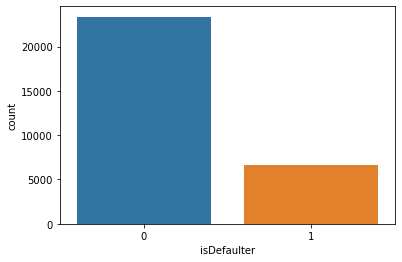

In [4]:
sns.countplot(df['isDefaulter'])

/home/pigeon/Downloads/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isDefaulter', ylabel='count'>

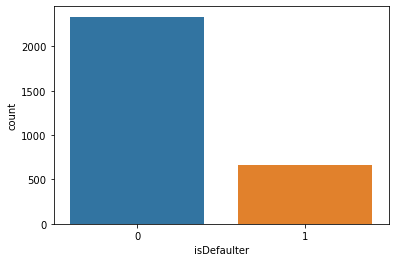

In [5]:
sns.countplot(y_test)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

logreg=LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

score_imbalanced=roc_auc_score(y_pred,y_test)

/home/pigeon/Downloads/yes/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
score_imbalanced

0.3891297099033011

<h3>vae oversampling</h3>


In [13]:
from launchpad import VAEify 

X_vae,y_vae=VAEify(X_train,y_train)

logreg.fit(X_vae,y_vae)

y_pred_vae=logreg.predict(X_test)

score_vae=roc_auc_score(y_pred_vae,y_test)

Minority and Majority class are:  1 0
Rows of the Org min 24
MIN,MAJ,Desired (5971, 24) (21029, 24) 15058
Train Epoch: 1 [0/5971 (0%)]	Loss: 16.628531
Train Epoch: 1 [10/5971 (0%)]	Loss: 11.931417
Train Epoch: 1 [20/5971 (0%)]	Loss: 11.013789
Train Epoch: 1 [30/5971 (1%)]	Loss: 10.214095
Train Epoch: 1 [40/5971 (1%)]	Loss: 8.905874
Train Epoch: 1 [50/5971 (1%)]	Loss: 10.878839
Train Epoch: 1 [60/5971 (1%)]	Loss: 9.696926
Train Epoch: 1 [70/5971 (1%)]	Loss: 8.398343
Train Epoch: 1 [80/5971 (1%)]	Loss: 7.688577
Train Epoch: 1 [90/5971 (2%)]	Loss: 11.110949
Train Epoch: 1 [100/5971 (2%)]	Loss: 10.332747
Train Epoch: 1 [110/5971 (2%)]	Loss: 9.429849
Train Epoch: 1 [120/5971 (2%)]	Loss: 9.418813
Train Epoch: 1 [130/5971 (2%)]	Loss: 9.431995
Train Epoch: 1 [140/5971 (2%)]	Loss: 8.641172
Train Epoch: 1 [150/5971 (3%)]	Loss: 9.618697
Train Epoch: 1 [160/5971 (3%)]	Loss: 9.706164
Train Epoch: 1 [170/5971 (3%)]	Loss: 11.793672
Train Epoch: 1 [180/5971 (3%)]	Loss: 11.075448
Train Epoch: 1 [190/59

/home/pigeon/Downloads/yes/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pigeon/Downloads/yes/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<h2>WGAN</h2>

In [9]:
from launchpad import WGANify

X_wgan,y_wgan=WGANify(X_train,y_train)



Using device: cuda

NVIDIA GeForce MX130
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB
Using device: cuda

NVIDIA GeForce MX130
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


/home/pigeon/Downloads/yes/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


[12660/12660] LG:0.284 LD:0.216 D:0.223 GP:0.000 AC: 0.457 RMSEAVG:0.328 NUM:0.333 SynTraiAuc:0.406 RFAcc:1.000    


In [10]:
logreg.fit(X_wgan,y_wgan)

y_pred_wgan=logreg.predict(X_test)

score_wgan=roc_auc_score(y_pred_wgan,y_test)

/home/pigeon/Downloads/yes/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pigeon/Downloads/yes/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


/home/pigeon/Downloads/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

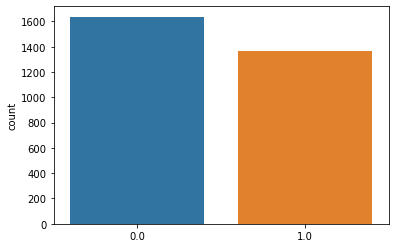

In [11]:
sns.countplot(y_pred_wgan)

<h3> SMOTE </h3>

In [12]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

logreg.fit(X_smote,y_smote)

y_pred_smote=logreg.predict(X_test)

score_smote=roc_auc_score(y_pred_smote,y_test)

/home/pigeon/Downloads/yes/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
